In [1]:
import os
import random
import yaml
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.interpolate import CubicSpline, interp1d

## CNModel

In [ ]:
output_dir = '/home/kedoxey/DCN_model/output/response_maps-wider_loss'
filename = '25fs_11dbs-response_map'
rm_data_norm = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-single_cell/DATA-25fs_11dbs_16000cf-response_map.pkl', 'rb'))
rm_data_loss_m1_95 = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-single_cell_loss-m1_95/DATA-25fs_11dbs_16000cf-response_map-loss.pkl', 'rb'))
rm_data_loss_m2 = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-single_cell_loss-m2/DATA-25fs_11dbs_16000cf-response_map-loss.pkl', 'rb'))


In [3]:
freqs_log = rm_data_norm['freqs_log']
levels = rm_data_norm['levels']

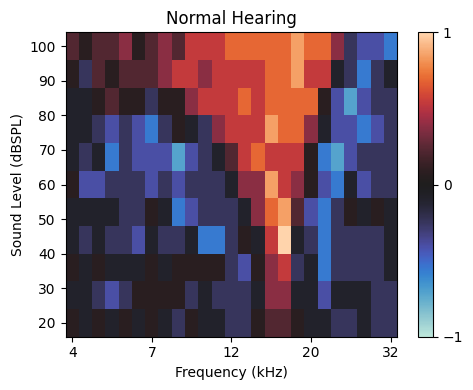

In [4]:
cmap = sns.color_palette("icefire", as_cmap=True)
# cmap = cm.twilight

fig, axs = plt.subplots(1,1,figsize=(5,4))  #, layout='constrained')

im = axs.pcolormesh(freqs_log, levels, rm_data_norm['matrix']/np.max(rm_data_norm['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs.set_title('Normal')
axs.set_ylabel('Sound Level (dBSPL)')
axs.set_xticks([freqs_log[i] for i in [0, 6, 12, 18, 24]])
axs.set_xticklabels([4, 7, 12, 20, 32])

# title = 'Hearing Loss' if 'loss' in self.hearing else 'Normal Hearing'
axs.set_title('Normal Hearing')
axs.set_xlabel('Frequency (kHz)')

fig.colorbar(im, ticks=[-1,0,1])
# fig.set_dpi(200)
fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'normal_hearing_normalized.png'), dpi=300)

## Loss-m1 - Normal

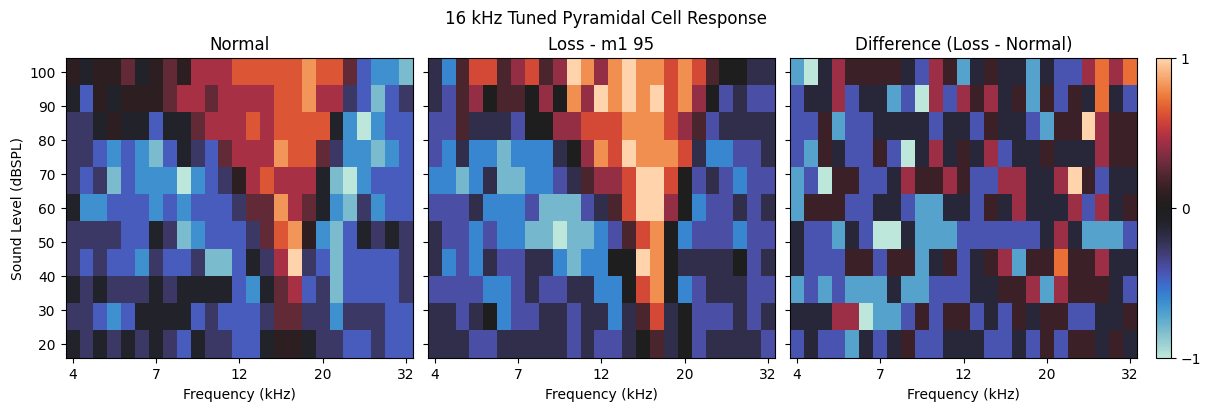

In [14]:
cmap = sns.color_palette("icefire", as_cmap=True)
matrix_diff = rm_data_loss_m1_95['matrix'] - rm_data_norm['matrix']

fig, axs = plt.subplots(1,3,figsize=(12,4), sharex=True, sharey=True, layout='constrained')

matrix = rm_data_norm['matrix']
matrix_norm = 2*((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))) - 1
axs[0].pcolormesh(freqs_log, levels, matrix_norm, cmap=cmap, vmin=-1, vmax=1) 
axs[0].set_title('Normal')
axs[0].set_ylabel('Sound Level (dBSPL)')

matrix = rm_data_loss_m1_95['matrix']
matrix_norm = 2*((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))) - 1
axs[1].pcolormesh(freqs_log, levels, matrix_norm, cmap=cmap, vmin=-1, vmax=1) 
axs[1].set_title('Loss - m1 95')

matrix = matrix_diff
matrix_norm = 2*((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))) - 1
im = axs[2].pcolormesh(freqs_log, levels, matrix_norm, cmap=cmap, vmin=-1, vmax=1)  # TODO: change colormap
axs[2].set_xticks([freqs_log[i] for i in [0, 6, 12, 18, 24]])
axs[2].set_xticklabels([4, 7, 12, 20, 32])

# title = 'Hearing Loss' if 'loss' in self.hearing else 'Normal Hearing'
axs[2].set_title('Difference (Loss - Normal)')

for ax in axs:
    ax.set_xlabel('Frequency (kHz)')

fig.colorbar(im, ticks=[-1,0,1])
fig.suptitle('16 kHz Tuned Pyramidal Cell Response');
# fig.set_dpi(200)
# fig.tight_layout()
# fig.savefig(os.path.join(output_dir, 'response_map_difference.png'), dpi=300)

In [9]:
rm_data_norm_24000 = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-single_cell/DATA-25fs_11dbs_24000cf-response_map.pkl', 'rb'))
rm_data_loss_m1_24000 =pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-single_cell_loss-m1_95/DATA-25fs_11dbs_24000cf-response_map-loss.pkl', 'rb'))


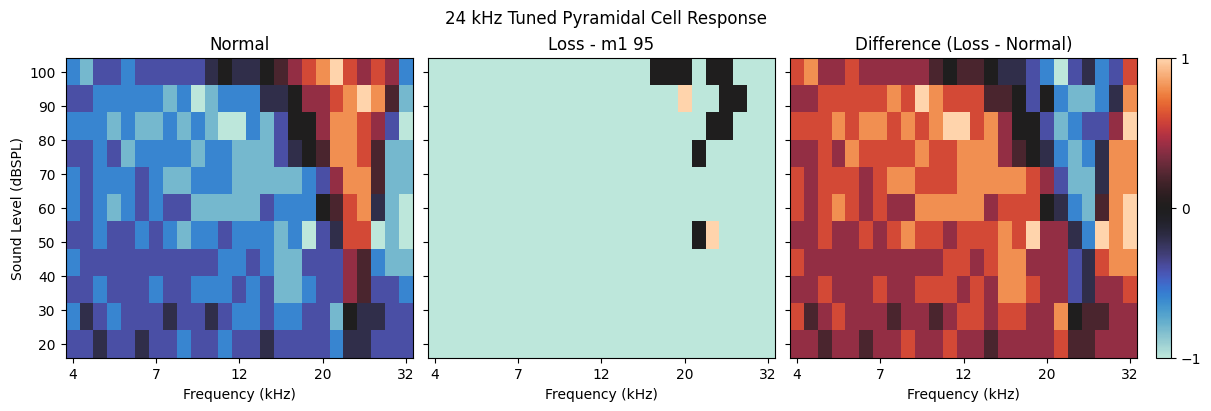

In [13]:
cmap = sns.color_palette("icefire", as_cmap=True)
matrix_diff = rm_data_loss_m1_24000['matrix'] - rm_data_norm_24000['matrix']

fig, axs = plt.subplots(1,3,figsize=(12,4), sharex=True, sharey=True, layout='constrained')

matrix = rm_data_norm_24000['matrix']
matrix_norm = 2*((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))) - 1
axs[0].pcolormesh(freqs_log, levels, matrix_norm, cmap=cmap, vmin=-1, vmax=1) 
axs[0].set_title('Normal')
axs[0].set_ylabel('Sound Level (dBSPL)')

matrix = rm_data_loss_m1_24000['matrix']
matrix_norm = 2*((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))) - 1
axs[1].pcolormesh(freqs_log, levels, matrix_norm, cmap=cmap, vmin=-1, vmax=1) 
axs[1].set_title('Loss - m1 95')

matrix = matrix_diff
matrix_norm = 2*((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))) - 1
im = axs[2].pcolormesh(freqs_log, levels, matrix_norm, cmap=cmap, vmin=-1, vmax=1)  # TODO: change colormap
axs[2].set_xticks([freqs_log[i] for i in [0, 6, 12, 18, 24]])
axs[2].set_xticklabels([4, 7, 12, 20, 32])

# title = 'Hearing Loss' if 'loss' in self.hearing else 'Normal Hearing'
axs[2].set_title('Difference (Loss - Normal)')

for ax in axs:
    ax.set_xlabel('Frequency (kHz)')

fig.colorbar(im, ticks=[-1,0,1])
fig.suptitle('24 kHz Tuned Pyramidal Cell Response');
# fig.set_dpi(200)
# fig.tight_layout()
# fig.savefig(os.path.join(output_dir, 'response_map_difference.png'), dpi=300)

## Loss-m2 - Normal

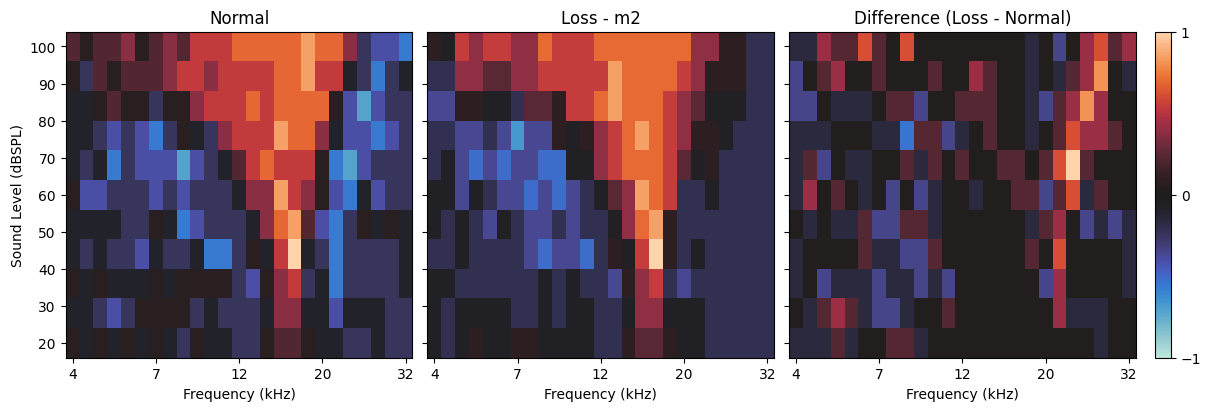

In [8]:
cmap = sns.color_palette("icefire", as_cmap=True)
matrix = rm_data_loss_m2['matrix'] - rm_data_norm['matrix']

fig, axs = plt.subplots(1,3,figsize=(12,4), sharex=True, sharey=True, layout='constrained')

axs[0].pcolormesh(freqs_log, levels, rm_data_norm['matrix']/np.max(rm_data_norm['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs[0].set_title('Normal')
axs[0].set_ylabel('Sound Level (dBSPL)')

axs[1].pcolormesh(freqs_log, levels, rm_data_loss_m2['matrix']/np.max(rm_data_loss_m2['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs[1].set_title('Loss - m2')

im = axs[2].pcolormesh(freqs_log, levels, matrix/np.max(matrix), cmap=cmap, vmin=-1, vmax=1)  # TODO: change colormap
axs[2].set_xticks([freqs_log[i] for i in [0, 6, 12, 18, 24]])
axs[2].set_xticklabels([4, 7, 12, 20, 32])

# title = 'Hearing Loss' if 'loss' in self.hearing else 'Normal Hearing'
axs[2].set_title('Difference (Loss - Normal)')

for ax in axs:
    ax.set_xlabel('Frequency (kHz)')

fig.colorbar(im, ticks=[-1,0,1])
# fig.set_dpi(200)
# fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'response_map_difference.png'), dpi=300)

## IC - Normal

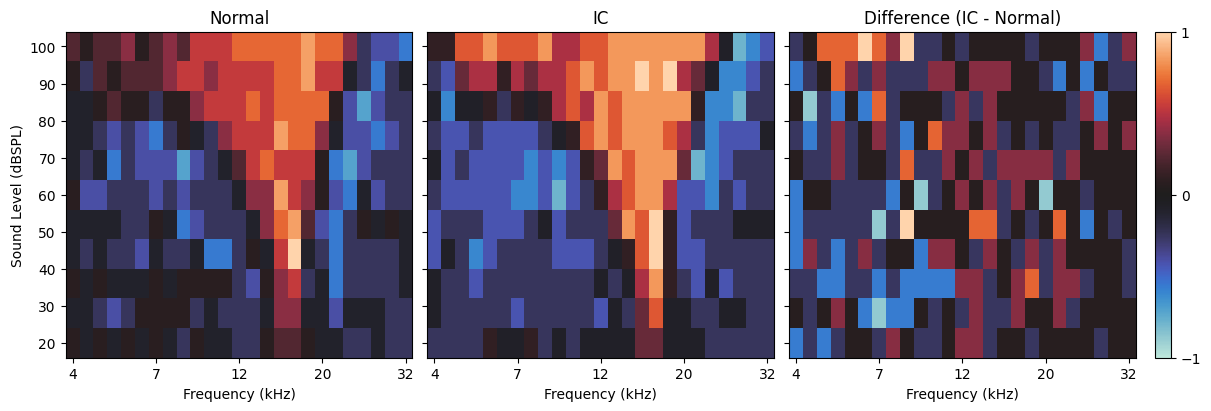

In [8]:

matrix = rm_data_ic['matrix'] - rm_data_norm['matrix']

fig, axs = plt.subplots(1,3,figsize=(12,4), sharex=True, sharey=True, layout='constrained')

axs[0].pcolormesh(freqs_log, levels, rm_data_norm['matrix']/np.max(rm_data_norm['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs[0].set_title('Normal')
axs[0].set_ylabel('Sound Level (dBSPL)')

axs[1].pcolormesh(freqs_log, levels, rm_data_ic['matrix']/np.max(rm_data_ic['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs[1].set_title('IC')

im = axs[2].pcolormesh(freqs_log, levels, matrix/np.max(matrix), cmap=cmap, vmin=-1, vmax=1)  # TODO: change colormap
axs[2].set_xticks([freqs_log[i] for i in [0, 6, 12, 18, 24]])
axs[2].set_xticklabels([4, 7, 12, 20, 32])

# title = 'Hearing Loss' if 'loss' in self.hearing else 'Normal Hearing'
axs[2].set_title('Difference (IC - Normal)')

for ax in axs:
    ax.set_xlabel('Frequency (kHz)')

fig.colorbar(im, ticks=[-1,0,1])
# fig.set_dpi(200)
# fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'response_map_difference.png'), dpi=300)

## IC - Loss

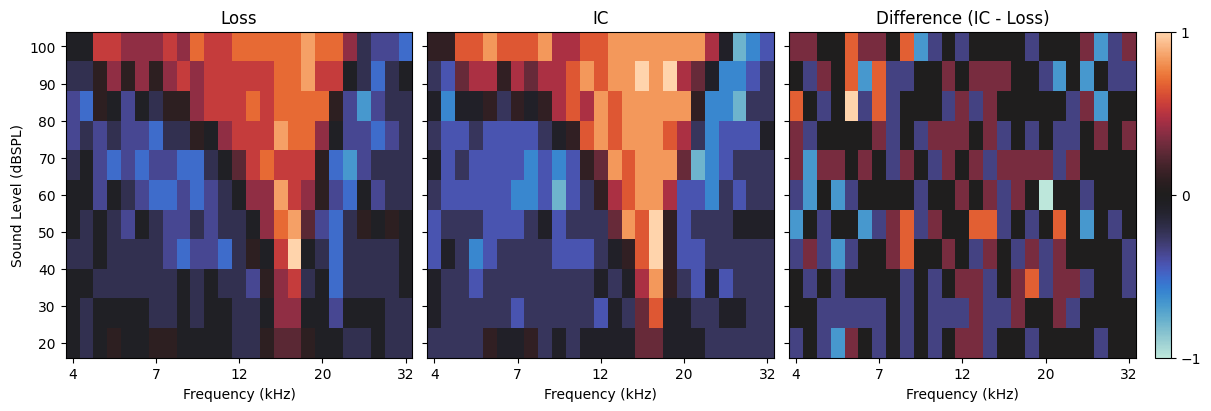

In [9]:

matrix = rm_data_ic['matrix'] - rm_data_loss['matrix']

fig, axs = plt.subplots(1,3,figsize=(12,4), sharex=True, sharey=True, layout='constrained')

axs[0].pcolormesh(freqs_log, levels, rm_data_loss['matrix']/np.max(rm_data_loss['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs[0].set_title('Loss')
axs[0].set_ylabel('Sound Level (dBSPL)')

axs[1].pcolormesh(freqs_log, levels, rm_data_ic['matrix']/np.max(rm_data_ic['matrix']), cmap=cmap, vmin=-1, vmax=1) 
axs[1].set_title('IC')

im = axs[2].pcolormesh(freqs_log, levels, matrix/np.max(matrix), cmap=cmap, vmin=-1, vmax=1)  # TODO: change colormap
axs[2].set_xticks([freqs_log[i] for i in [0, 6, 12, 18, 24]])
axs[2].set_xticklabels([4, 7, 12, 20, 32])

# title = 'Hearing Loss' if 'loss' in self.hearing else 'Normal Hearing'
axs[2].set_title('Difference (IC - Loss)')

for ax in axs:
    ax.set_xlabel('Frequency (kHz)')

fig.colorbar(im, ticks=[-1,0,1])
# fig.set_dpi(200)
# fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'response_map_difference.png'), dpi=300)

## NetPyNE

In [ ]:
file_name = 'Ix0.5_2-10cells-0.025_220ms-NSA_60Hz-num_spikes.npy'
# file_name = 'Ix0.5_2-10cells-num_spikes.npy'
file_path = f'/home/kedoxey/DCN_model/output/no_W-log/data/{file_name}'

num_spikes = np.load(file_path, allow_pickle=True).item()
# num_spikes = np.load(file_name, allow_pickle=True).item()


In [4]:
num_spikes[1.5]

{0.0: {0: nan,
  1: nan,
  2: nan,
  3: nan,
  4: nan,
  5: nan,
  6: nan,
  7: nan,
  8: nan,
  9: nan,
  10: nan,
  11: nan,
  12: nan,
  13: nan,
  14: nan,
  15: nan,
  16: nan,
  17: nan,
  18: nan,
  19: nan,
  20: nan,
  21: nan,
  22: nan,
  23: nan,
  24: nan,
  25: nan,
  26: nan,
  27: nan,
  28: nan,
  29: nan,
  30: nan,
  31: nan,
  32: nan,
  33: nan,
  34: nan,
  35: nan,
  36: nan,
  37: nan,
  38: nan,
  39: nan,
  40: nan,
  41: nan,
  42: nan,
  43: nan,
  44: nan,
  45: nan,
  46: nan,
  47: nan,
  48: nan,
  49: nan,
  50: nan,
  51: nan,
  52: nan,
  53: nan,
  54: nan,
  55: nan,
  56: nan,
  57: nan,
  58: nan,
  59: nan,
  60: nan,
  61: nan,
  62: nan,
  63: nan,
  64: nan,
  65: nan,
  66: nan,
  67: nan,
  68: nan,
  69: nan,
  70: nan,
  71: nan,
  72: nan,
  73: nan,
  74: nan,
  75: nan,
  76: nan,
  77: nan,
  78: nan,
  79: nan,
  80: nan,
  81: nan,
  82: nan,
  83: nan,
  84: nan,
  85: nan,
  86: nan,
  87: nan,
  88: nan,
  89: nan,
  90: nan,
  91

In [82]:
p_spon_freq = num_spikes[0.5][0][0]
p_spon_freq

45.045045045056106

78.951078528144
78.951078528144
78.951078528144
78.951078528144


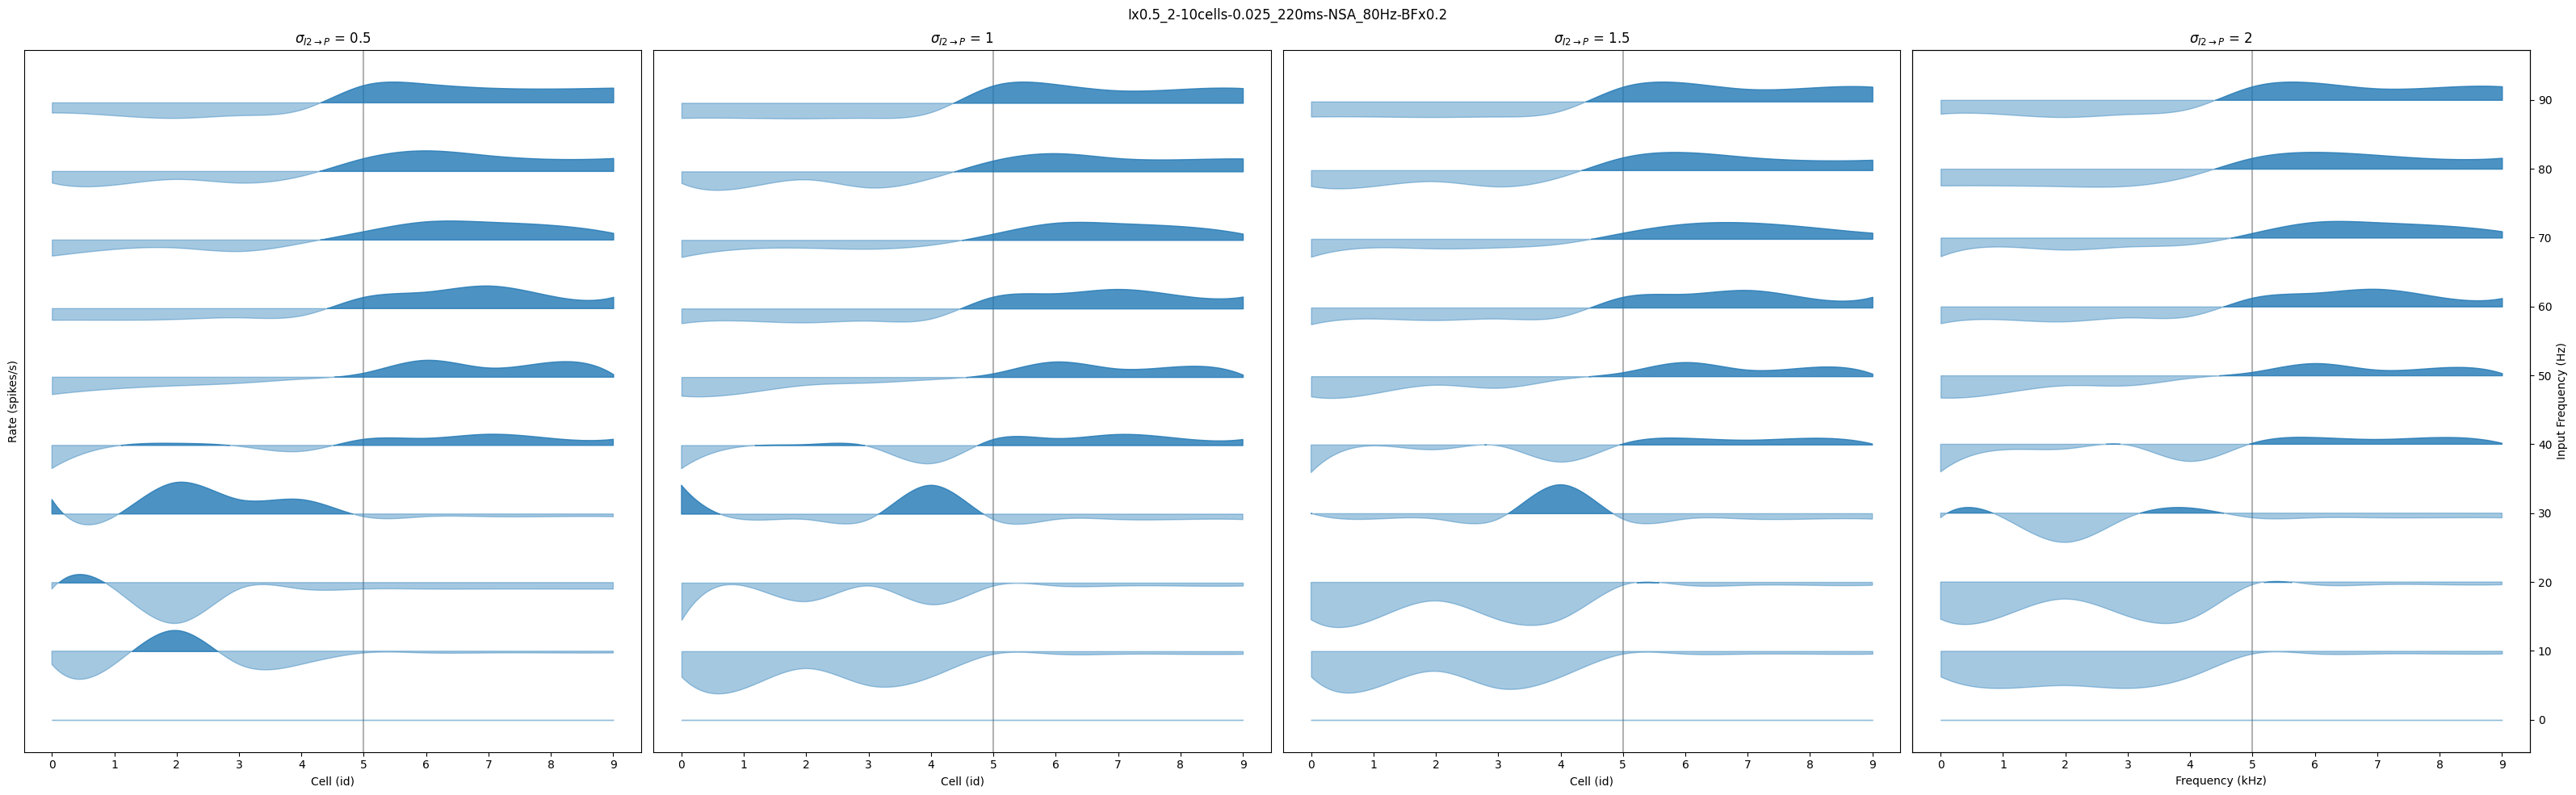

In [2]:
n_cells = 10
sim_flag = 'no_W-np_params'
sim_label = f'Ix0.5_2-{n_cells}cells-0.025_220ms-NSA_80Hz-BFx0.2'
sim_dir = f'/home/kedoxey/DCN_model/output/{sim_flag}/{sim_label}'
file_name = f'{sim_label}-num_spikes.npy'
# file_name = 'Ix0.5_2-10cells-num_spikes.npy'
file_path = f'/home/kedoxey/DCN_model/output/{sim_flag}/data/{file_name}'

num_spikes = np.load(file_path, allow_pickle=True).item()


i_weights = list(num_spikes.keys())
bfs = list(num_spikes[i_weights[0]].keys())
bfs_lin = [10*i for i in range(len(bfs))]

col_list = pd.MultiIndex.from_tuples([(i_w, bf) for i_w in i_weights for bf in bfs])  # [(bf, i_w) for i_w in num_spikes.keys() for bf in num_spikes[i_w].keys()])

n_cells = len(num_spikes[i_weights[0]][bfs[0]])

num_spikes_arr = np.ones((len(i_weights), n_cells, len(bfs)), dtype=int)

for i, weight_vals in enumerate(num_spikes.values()):

    for j, bf_vals in enumerate(weight_vals.values()):

        for cell_id, n_spikes in bf_vals.items():
            
            if np.isnan(n_spikes):
                n_spikes = 0

            num_spikes_arr[i, cell_id, j] = n_spikes

num_spikes_arr = np.concatenate([num_spikes_arr[i,:,:] for i in range(len(i_weights))], axis=1)

num_spikes_df = pd.DataFrame(num_spikes_arr, columns=col_list)

if 0 in i_weights:
    i_weights.remove(0)

fig, axs = plt.subplots(1, len(i_weights), figsize=(8*len(i_weights),10))

# p_spon_freq = 36
scale = 0.2

ax2 = axs[-1].twinx()

for i, i_w in enumerate(i_weights):

    p_spon_freq = num_spikes[i_w][0][0]
    print(p_spon_freq)

    yticks = []
    ax = axs[i] if len(i_weights) > 1 else axs

    if i == len(i_weights)-1: ax = ax2

    for bf_i, (bf, col) in enumerate(num_spikes_df[i_w].items()):
        # print(bf)
        # print(col.values)

        # if bf == 0:
        #     continue

        bf = bfs_lin[bf_i]

        yticks.append(bf*scale)

        cs = CubicSpline(range(n_cells), col, axis=0)
        new_cells = np.linspace(0, n_cells-1, 1000)
        new_spikes = cs(new_cells)

        amp = col.max() - col.min()
        if amp == 0: amp = 100
        diff = (new_spikes - p_spon_freq) / amp
        # pos = diff.copy()
        # pos[pos < 0] = 0
        # neg = diff.copy()
        # neg[neg > 0] = 0
        # temp = 5

        octaves = [i for i in range(n_cells)]

        # axs[i].plot(col.values + bf*scale)
        # axs[i].plot([p_spon_freq + bf*scale for i in col.values])
        ax.fill_between(new_cells, diff + bf*scale, [bf*scale for i in new_spikes], where=diff>=0, interpolate=True, color='tab:blue', alpha=0.8, zorder=12)
        ax.fill_between(new_cells, diff + bf*scale, [bf*scale for i in new_spikes], where=diff<=0, interpolate=True, color='tab:blue', alpha=0.4, zorder=12)
        # axs[i].fill_between(octaves, pos + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.8)
        # axs[i].fill_between(octaves, neg + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.4)

    ax.set_title(r'$\sigma_{I2\rightarrow P}$ = '+ f'{i_w}')
    # ax.set_xticks([(n_cells-1)*i for i in [0, 0.25, 0.5, 0.75, 1]]) 
    # ax.set_xticklabels(['1.25', '', '5', '', '20'])
    # ax.set_xlabel('Input (kHz)')
    ax.set_xticks([i for i in range(n_cells)]) 
    ax.set_xlabel('Cell (id)')
    ax.set_yticks([])
    ax.set_yticklabels('')

    ax.axvline(n_cells//2, color='k', alpha=0.3, zorder=0)

axs[-1].set_yticks([])
axs[-1].set_yticklabels('')
axs[-1].set_xlabel('Frequency (kHz)')
    
ax2.set_ylabel('Input Frequency (Hz)')  #Sound level (db)')
ax2.set_yticks(yticks)
ax2.set_yticklabels(bfs_lin)
# ax2.set_yticklabels(bfs)


axs[0].set_ylabel('Rate (spikes/s)')

fig.suptitle(sim_label)
fig.tight_layout()
fig.savefig(os.path.join(sim_dir, 'response_map.png'), dpi=300)


In [14]:
zero_spikes = num_spikes_df[0.5][0].values
cells = list(num_spikes_df[0.5][0].index)

cs = CubicSpline(cells, zero_spikes, axis=0)
new_cells = np.linspace(0, 9, 100)
new_spikes = cs(new_cells)
len(new_spikes)


100

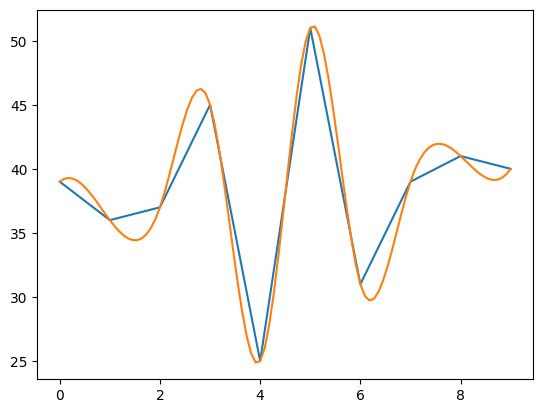

In [37]:
plt.plot(cells, zero_spikes)
plt.plot(new_cells, new_spikes)

In [9]:
file_name_05 = 'Ix0.5-100cells-0.025_220ms-num_spikes.npy'

num_spikes_05 = np.load(f'output/data/{file_name_05}', allow_pickle=True).item()



In [10]:
i_weights = list(num_spikes_05.keys())
bfs = list(num_spikes_05[i_weights[0]].keys())

col_list = pd.MultiIndex.from_tuples([(i_w, bf) for i_w in i_weights for bf in bfs])  # [(bf, i_w) for i_w in num_spikes.keys() for bf in num_spikes[i_w].keys()])
col_list

MultiIndex([(0.5,  0),
            (0.5, 10),
            (0.5, 20),
            (0.5, 30),
            (0.5, 40),
            (0.5, 50),
            (0.5, 60)],
           )

In [11]:
n_cells = len(num_spikes_05[i_weights[0]][bfs[0]])

num_spikes_05_arr = np.ones((len(i_weights), n_cells, len(bfs)), dtype=int)

for i, weight_vals in enumerate(num_spikes_05.values()):

    for j, bf_vals in enumerate(weight_vals.values()):

        for cell_id, n_spikes in bf_vals.items():
            
            if np.isnan(n_spikes):
                n_spikes = 0

            num_spikes_05_arr[i, cell_id, j] = n_spikes

num_spikes_05_arr = np.concatenate([num_spikes_05_arr[i,:,:] for i in range(len(i_weights))], axis=1)

In [12]:
num_spikes_05_df = pd.DataFrame(num_spikes_05_arr, columns=col_list)
num_spikes_05_df

0.5                        
    0   10  20  30  40  50  60
0   31  27  24  32  28  39  21
1   36  39  39  40  36  22  24
2   33  38  21  18  16  19  20
3   30  24  40  48  36  45  42
4   39  28  28  20  23  12  66
..  ..  ..  ..  ..  ..  ..  ..
95  32  44  44  35  36  38  19
96  39  43  36  29  32  41  42
97  36  35  23  24  23  11  24
98  37  21  30  28  48  36  40
99  41  30  39  63  18  29  26

[100 rows x 7 columns]

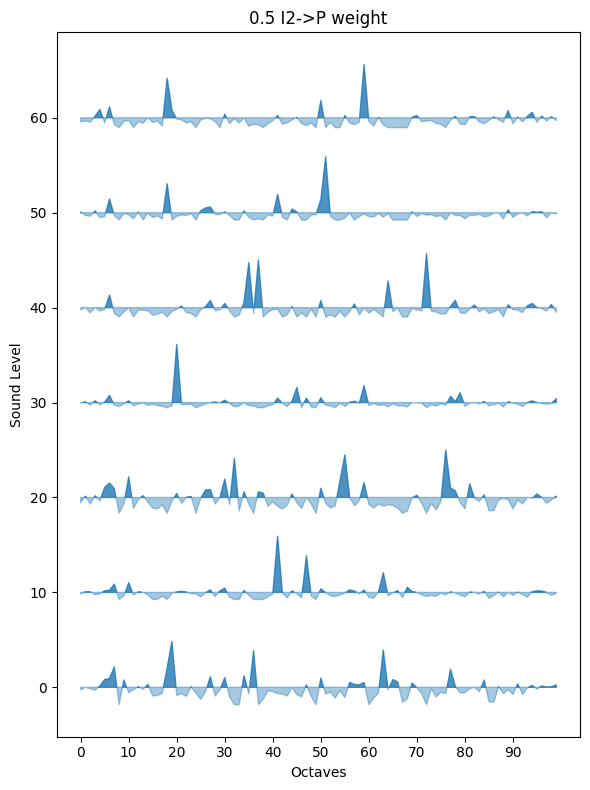

In [13]:
fig, axs = plt.subplots(1, len(i_weights), figsize=(6*len(i_weights),8))

p_spon_freq = 36
scale = 0.15

for i, i_w in enumerate(i_weights):

    yticks = []
    ax = axs[i] if len(i_weights) > 1 else axs

    for bf, col in num_spikes_05_df[i_w].items():
        # print(bf)
        # print(col.values)

        yticks.append(bf*scale)

        diff = (col.values - p_spon_freq) / (col.max() - col.min())
        pos = diff.copy()
        pos[pos < 0] = 0
        neg = diff.copy()
        neg[neg > 0] = 0
        temp = 5

        octaves = [i for i in range(n_cells)]

        # axs[i].plot(col.values + bf*scale)
        # axs[i].plot([p_spon_freq + bf*scale for i in col.values])
        ax.fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff>=0, interpolate=True, color='tab:blue', alpha=0.8)
        ax.fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff<=0, interpolate=True, color='tab:blue', alpha=0.4)
        # axs[i].fill_between(octaves, pos + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.8)
        # axs[i].fill_between(octaves, neg + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.4)

    ax.set_title(f'{i_w} I2->P weight')
    ax.set_xticks([10*i for i in range(n_cells//10)])
    # ax.set_xticklabels([i for i in range(1,n_cells+1)])
    ax.set_xlabel('Octaves')
    ax.set_yticks(yticks)
    ax.set_yticklabels(bfs)

ax.set_ylabel('Sound Level')

fig.tight_layout()

In [16]:
i_weights

[0.5]

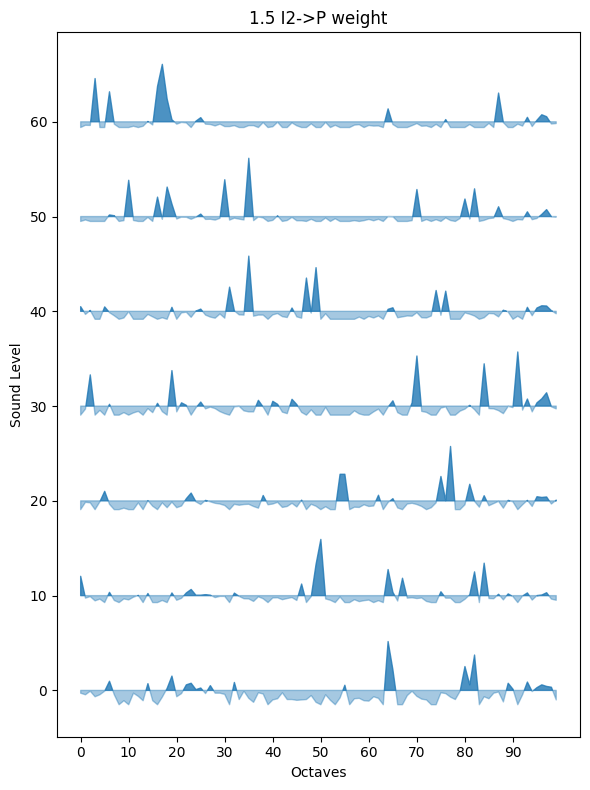

In [17]:
file_name_15 = 'Ix1.5-100cells-0.025_220ms-num_spikes.npy'

num_spikes_15 = np.load(f'output/data/{file_name_15}', allow_pickle=True).item()

i_weights = list(num_spikes_15.keys())
bfs = list(num_spikes_15[i_weights[0]].keys())

col_list = pd.MultiIndex.from_tuples([(i_w, bf) for i_w in i_weights for bf in bfs])  # [(bf, i_w) for i_w in num_spikes.keys() for bf in num_spikes[i_w].keys()])

n_cells = len(num_spikes_15[i_weights[0]][bfs[0]])

num_spikes_15_arr = np.ones((len(i_weights), n_cells, len(bfs)), dtype=int)

for i, weight_vals in enumerate(num_spikes_15.values()):

    for j, bf_vals in enumerate(weight_vals.values()):

        for cell_id, n_spikes in bf_vals.items():
            
            if np.isnan(n_spikes):
                n_spikes = 0

            num_spikes_15_arr[i, cell_id, j] = n_spikes

num_spikes_15_arr = np.concatenate([num_spikes_15_arr[i,:,:] for i in range(len(i_weights))], axis=1)

num_spikes_15_df = pd.DataFrame(num_spikes_15_arr, columns=col_list)

fig, axs = plt.subplots(1, len(i_weights), figsize=(6*len(i_weights),8))

p_spon_freq = 36
scale = 0.15

for i, i_w in enumerate(i_weights):

    yticks = []
    ax = axs[i] if len(i_weights) > 1 else axs

    for bf, col in num_spikes_15_df[i_w].items():
        # print(bf)
        # print(col.values)

        yticks.append(bf*scale)

        diff = (col.values - p_spon_freq) / (col.max() - col.min())
        pos = diff.copy()
        pos[pos < 0] = 0
        neg = diff.copy()
        neg[neg > 0] = 0
        temp = 5

        octaves = [i for i in range(n_cells)]

        # axs[i].plot(col.values + bf*scale)
        # axs[i].plot([p_spon_freq + bf*scale for i in col.values])
        ax.fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff>=0, interpolate=True, color='tab:blue', alpha=0.8)
        ax.fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff<=0, interpolate=True, color='tab:blue', alpha=0.4)
        # axs[i].fill_between(octaves, pos + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.8)
        # axs[i].fill_between(octaves, neg + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.4)

    ax.set_title(f'{i_w} I2->P weight')
    ax.set_xticks([10*i for i in range(n_cells//10)])
    # ax.set_xticklabels([i for i in range(1,n_cells+1)])
    ax.set_xlabel('Octaves')
    ax.set_yticks(yticks)
    ax.set_yticklabels(bfs)

ax.set_ylabel('Sound Level')

fig.tight_layout()


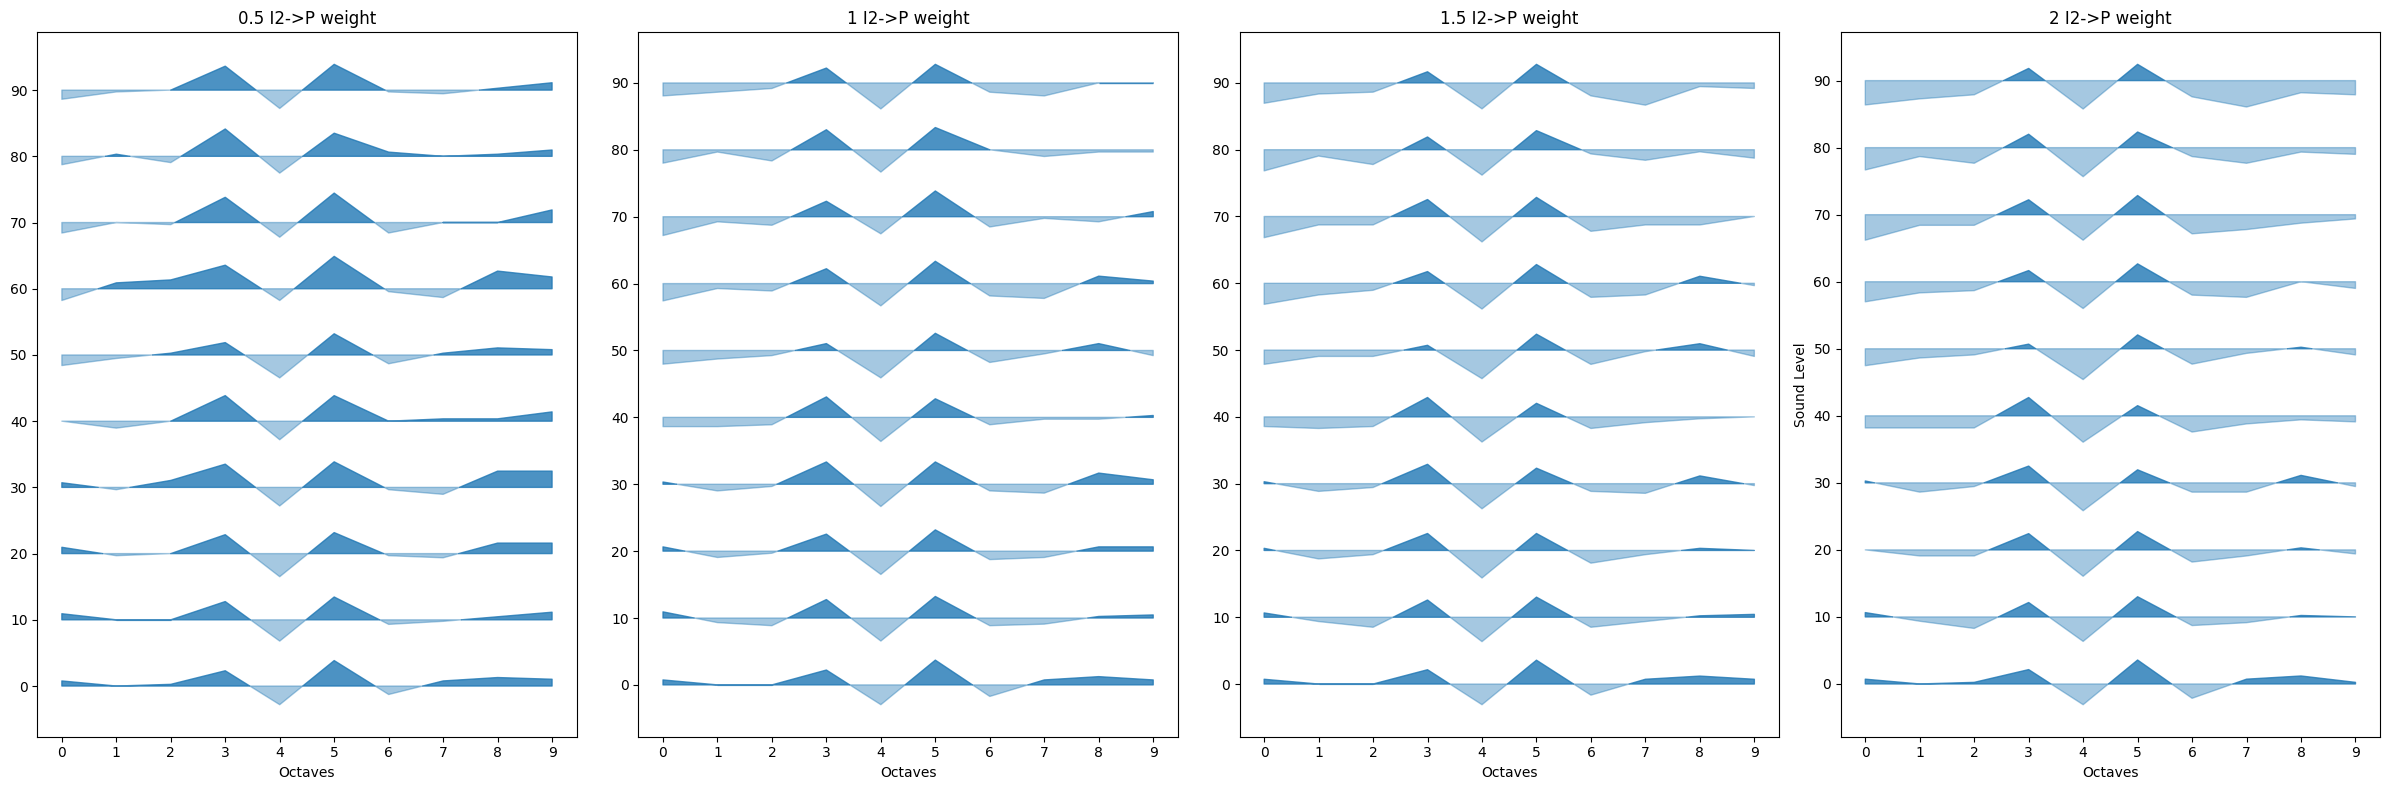

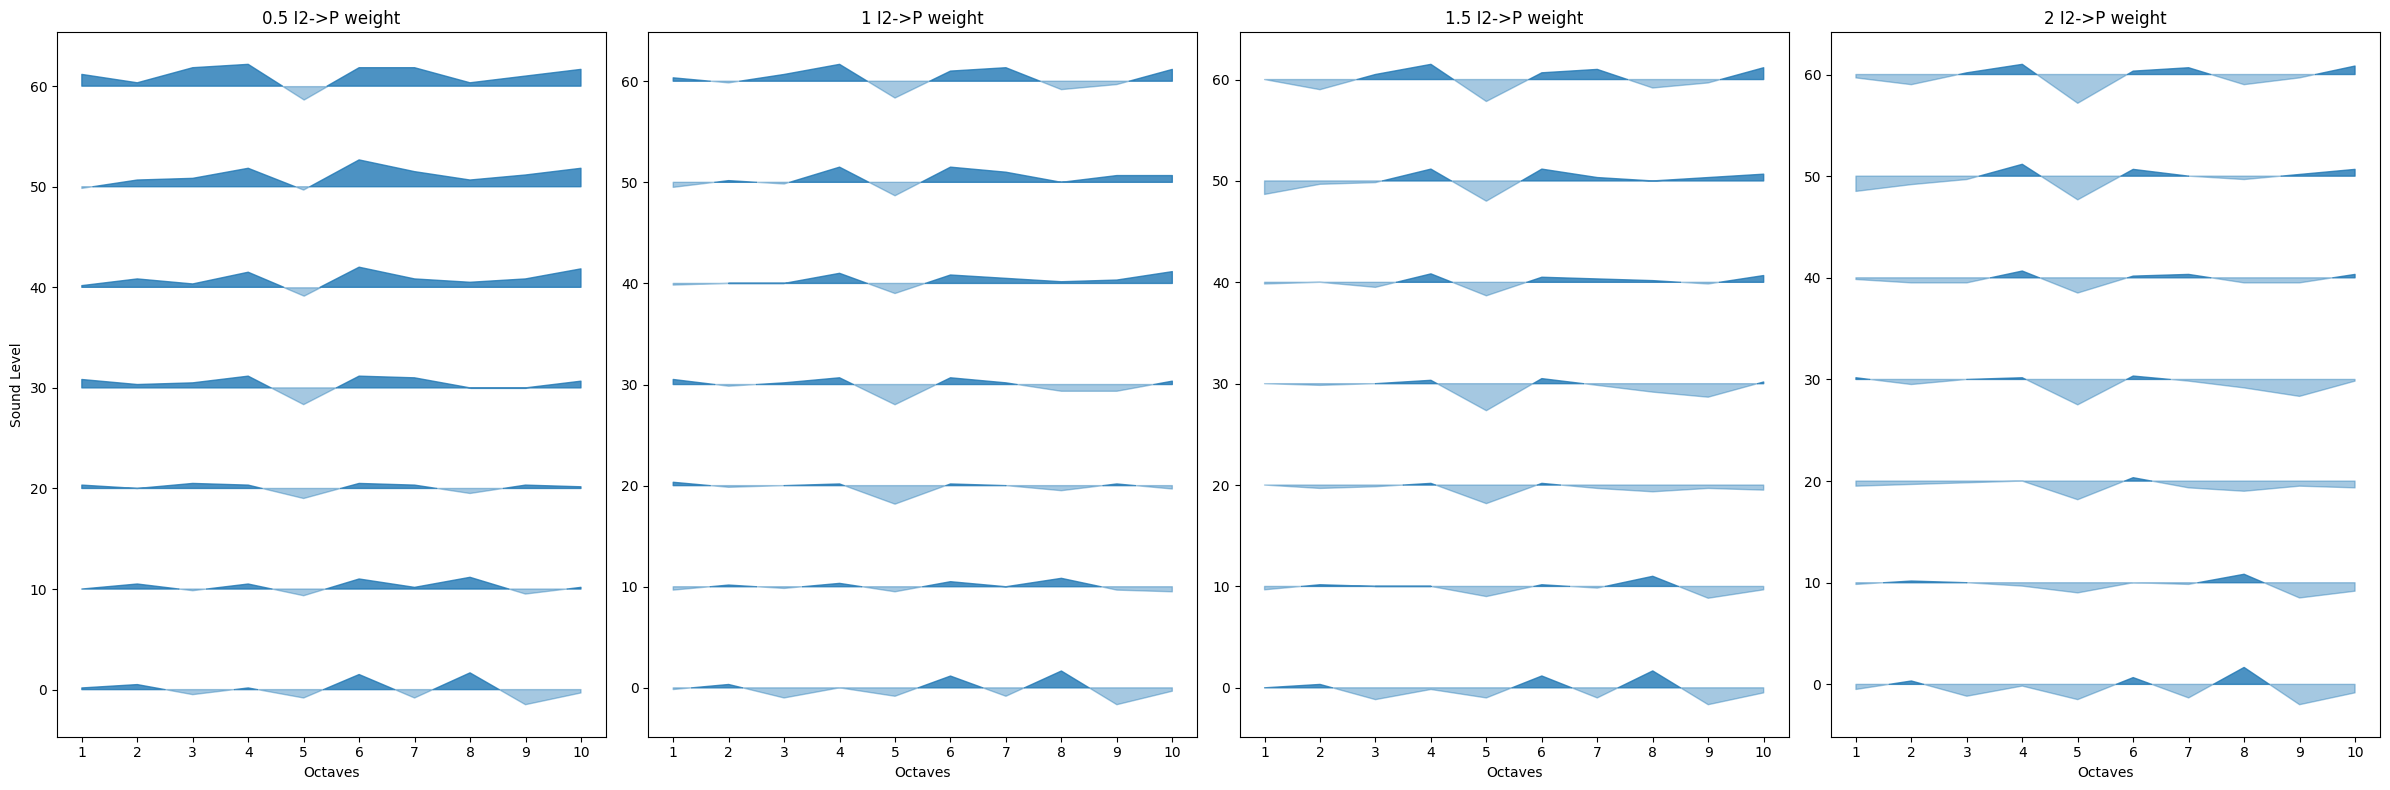

In [41]:
fig, axs = plt.subplots(1, len(i_weights), figsize=(6*len(i_weights),8))

p_spon_freq = 36
scale = 6

for i, i_w in enumerate(i_weights):

    yticks = []

    for bf, col in num_spikes_df[i_w].items():
        # print(bf)
        # print(col.values)

        yticks.append(bf*scale)

        diff = col.values - p_spon_freq
        pos = diff.copy()
        pos[pos < 0] = 0
        neg = diff.copy()
        neg[neg > 0] = 0
        temp = 5

        octaves = [i for i in range(n_cells)]

        # axs[i].plot(col.values + bf*scale)
        # axs[i].plot([p_spon_freq + bf*scale for i in col.values])
        axs[i].fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff>=0, interpolate=True, color='tab:blue', alpha=0.8)
        axs[i].fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff<=0, interpolate=True, color='tab:blue', alpha=0.4)
        # axs[i].fill_between(octaves, pos + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.8)
        # axs[i].fill_between(octaves, neg + bf*scale, [bf*scale for i in col.values], color='tab:blue', alpha=0.4)

        # axs[i].fill_between(octaves, diff + bf*scale, [bf*scale for i in col.values], where=diff>=0, interpolate=True, color='blue')
        # axs[i].fill_between(octaves, [bf*scale for i in col.values], where=diff+bf*scale<=bf*scale, interpolate=True, color='red')

    axs[i].set_title(f'{i_w} I2->P weight')
    axs[i].set_xticks([i for i in range(n_cells)])
    # axs[i].set_xticklabels([i for i in range(1,n_cells+1)])
    axs[i].set_xlabel('Cells (id)')
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(bfs)

axs[0].set_ylabel('Sound Level')

fig.tight_layout()